<a href="https://colab.research.google.com/github/Kirankumarpetlu/Sales-Forecasting-Using-SARIMAX/blob/main/salesforecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [56]:
data = pd.read_csv(r"/content/sales1.csv")
data.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [57]:
data.rename(columns={'Perrin Freres monthly champagne sales millions ?64-?72': 'sales'}, inplace=True)

In [58]:
data.head()

,Month,sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [61]:
data["Month"]

,Month
0,1964-01
1,1964-02
2,1964-03
3,1964-04
4,1964-05
...,...
102,1972-07
103,1972-08
104,1972-09
105,NaN


In [62]:
data = data.drop(index=106)


In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Month   105 non-null    object 
 1   sales   105 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.8+ KB


In [65]:
data['Month'] = pd.to_datetime(data['Month'])
data["Month"]

,Month
0,1964-01-01
1,1964-02-01
2,1964-03-01
3,1964-04-01
4,1964-05-01
...,...
101,1972-06-01
102,1972-07-01
103,1972-08-01
104,1972-09-01


In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Month   105 non-null    datetime64[ns]
 1   sales   105 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.8 KB


In [67]:
data.index = data['Month']
data.head()

,Month,sales
Month,,
1964-01-01,1964-01-01,2815.0
1964-02-01,1964-02-01,2672.0
1964-03-01,1964-03-01,2755.0
1964-04-01,1964-04-01,2721.0
1964-05-01,1964-05-01,2946.0


In [68]:
del data['Month']
data.head()

,sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


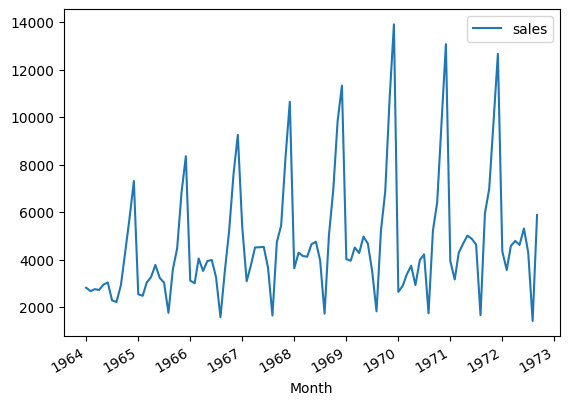

In [69]:
data.plot()
plt.show()

In [72]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data['sales'])

print('p-value: %f' % result[1])

if result[1]>0.05:
	print('not stationary')
else:
	print("stationary")

p-value: nan
stationary


In [74]:
from statsmodels.tsa.stattools import kpss
stats,p,lags,critical_values=kpss(data['sales'])
if p>0.05:
  print('stattionary')
else:
  print("not stationary")
print(p)

ValueError: cannot convert float NaN to integer

In [75]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import kpss
data['sales'] = pd.to_numeric(data['sales'], errors='coerce')
data.dropna(inplace=True)
nobs = len(data['sales'].dropna())
stats, p, lags, critical_values = kpss(data['sales'], nlags="legacy")

if p > 0.05:
    print('stationary')
else:
    print("not stationary")
print(p)

not stationary
0.021805428318532553


<Axes: title={'center': 'Original Values'}, xlabel='Month'>

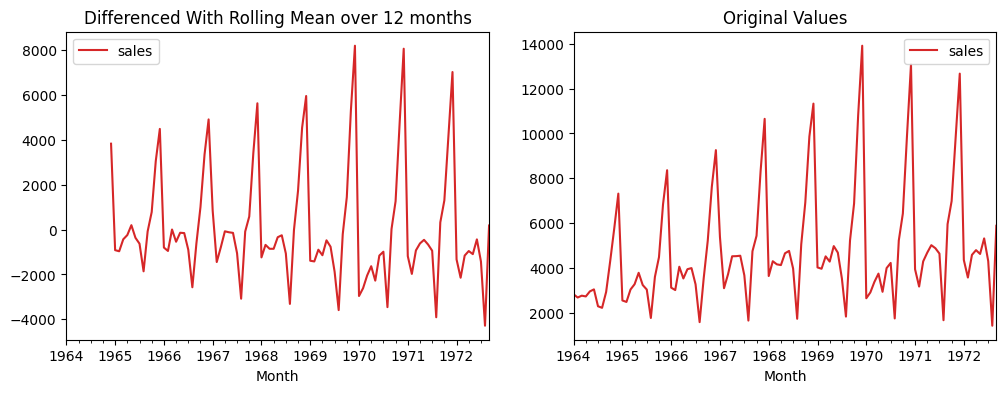

In [76]:
rolling_mean = data.rolling(window=12).mean()


rolling_mean_detrended = data - rolling_mean

ax1 = plt.subplot(121)
rolling_mean_detrended.plot(figsize=(12,4),color="tab:red",
                            title="Differenced With Rolling Mean over 12 months",
                            ax=ax1)
ax2 = plt.subplot(122)
data.plot(figsize=(12,4),
          color="tab:red",
          title="Original Values",
          ax=ax2)

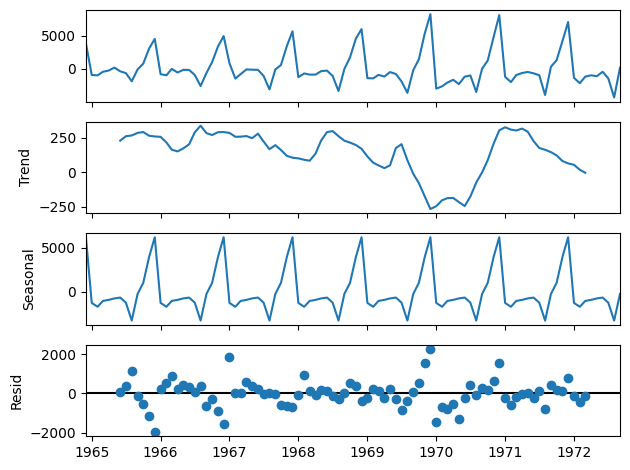

In [77]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_result = seasonal_decompose(rolling_mean_detrended.dropna())

decompose_result.plot();


<Axes: title={'center': 'Differenced With Rolling Mean over 12 months'}, xlabel='Month'>

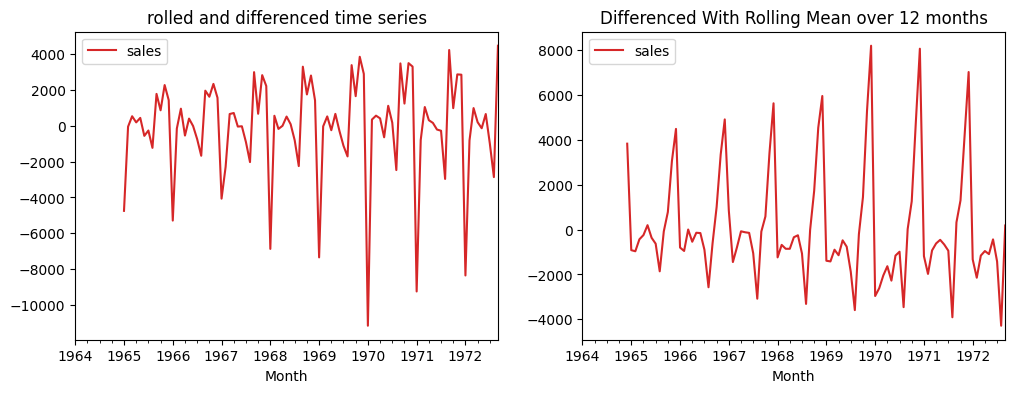

In [78]:
rolling_mean_detrended_diff = rolling_mean_detrended - rolling_mean_detrended.shift()

ax1 = plt.subplot(121)
rolling_mean_detrended_diff.plot(figsize=(12,4),
                                 color="tab:red",
                                 title="rolled and differenced time series",
                                 ax=ax1)
ax1 = plt.subplot(122)
rolling_mean_detrended.plot(figsize=(12,4),color="tab:red",
                            title="Differenced With Rolling Mean over 12 months",
                            ax=ax1)

<Axes: title={'center': 'Original Values'}, xlabel='Month'>

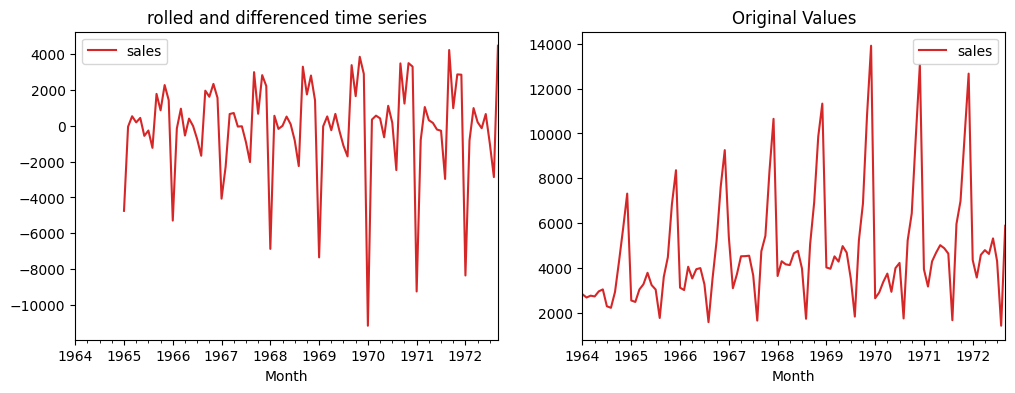

In [79]:
ax1 = plt.subplot(121)
rolling_mean_detrended_diff.plot(figsize=(12,4),
                                 color="tab:red",
                                 title="rolled and differenced time series",
                                 ax=ax1)
ax2 = plt.subplot(122)
data.plot(figsize=(12,4),
          color="tab:red",
          title="Original Values",
          ax=ax2)

In [81]:
rolling_mean_detrended_diff = rolling_mean_detrended_diff.dropna()
rolling_mean_detrended_diff

,sales
Month,
1965-01-01,-4748.166667
1965-02-01,-49.583333
1965-03-01,533.000000
1965-04-01,189.583333
1965-05-01,440.833333
...,...
1972-05-01,-137.333333
1972-06-01,657.500000
1972-07-01,-986.083333


In [87]:
from statsmodels.tsa.stattools import kpss
stats,p,lags,critical_values=kpss(data['sales'])
if p>0.05:
  print('stattionary')
else:
  print("not stationary")
print(p)

not stationary
0.03881258598340056


In [83]:
result = adfuller(rolling_mean_detrended_diff['sales'].dropna())
#print(result)

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -25.863381
p-value: 0.000000
Critical Values:
	1%: -3.513
	5%: -2.897
	10%: -2.586


In [85]:
dftest = adfuller(rolling_mean_detrended_diff['sales'], autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
  print("\t",key, ": ", val)

1. ADF :  -25.863381495050106
2. P-Value :  0.0
3. Num Of Lags :  10
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 82
5. Critical Values :
	 1% :  -3.512738056978279
	 5% :  -2.8974898650628984
	 10% :  -2.585948732897085


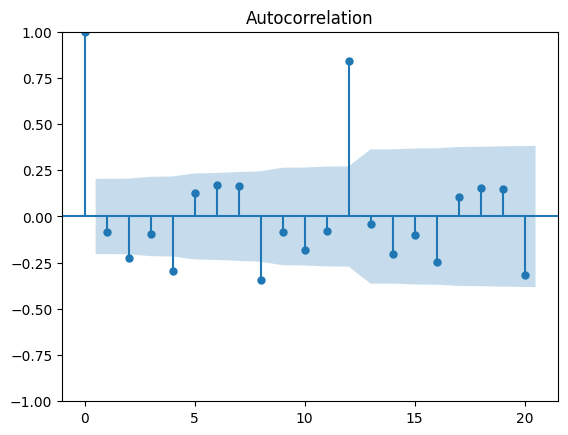

In [89]:
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(rolling_mean_detrended_diff['sales']);

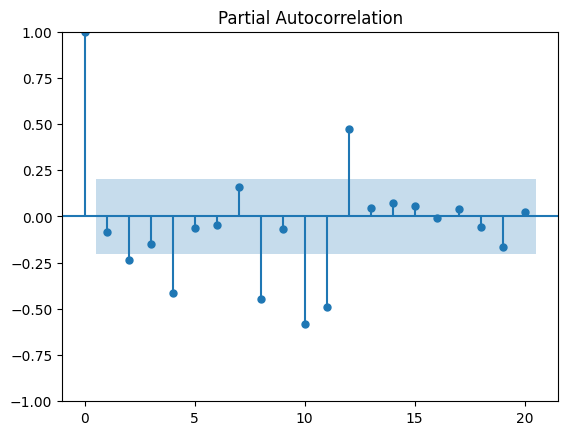

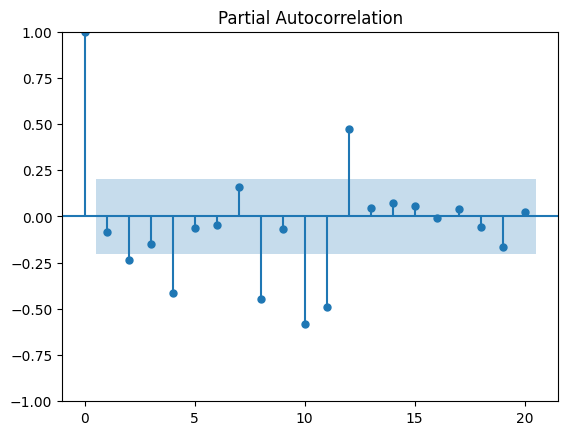

In [91]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(rolling_mean_detrended_diff['sales'])

In [92]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 23.5 MB/s eta 0:00:00


In [93]:
from pmdarima import auto_arima
order = auto_arima(rolling_mean_detrended_diff['sales'], trace=True)
order.summary()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1712.794, Time=1.88 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1741.740, Time=0.09 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1743.054, Time=0.10 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1742.108, Time=0.54 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1739.759, Time=0.08 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=5.59 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.96 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.63 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=1718.295, Time=0.40 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.38 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=1707.523, Time=0.54 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=1700.720, Time=0.62 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.53 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.62 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.65 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.56 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.56 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.73 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,0,3)(0,0,0)[0]             : AIC=1698.699, Time=0.56 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,3)(0,0,0)[0]             : AIC=1693.748, Time=0.47 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=1.89 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=1.23 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,4)(0,0,0)[0]             : AIC=inf, Time=1.62 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.31 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,4)(0,0,0)[0]             : AIC=inf, Time=0.28 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,0,2)(0,0,0)[0]             : AIC=inf, Time=0.37 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,0,4)(0,0,0)[0]             : AIC=1684.293, Time=0.59 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,0,4)(0,0,0)[0]             : AIC=inf, Time=0.63 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,0,5)(0,0,0)[0]             : AIC=inf, Time=0.72 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,5)(0,0,0)[0]             : AIC=inf, Time=0.85 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,0,3)(0,0,0)[0]             : AIC=inf, Time=0.55 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,0,5)(0,0,0)[0]             : AIC=inf, Time=0.81 sec

Best model:  ARIMA(4,0,4)(0,0,0)[0]          
Total fit time: 28.022 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   93
Model:               SARIMAX(4, 0, 4)   Log Likelihood                -833.146
Date:                Mon, 23 Dec 2024   AIC                           1684.293
Time:                        18:18:56   BIC                           1707.086
Sample:                    01-01-1965   HQIC                          1693.496
                         - 09-01-1972                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3609      0.128     -2.809      0.005      -0.613      -0.109
ar.L2          0.6042      0.166      3.647      0.000       0.279       0.929
ar.L3          0.1000      0.230      0.435      0.663      -0.350       0.550
ar.L4         -0.6046      0.129     -4.695      0.000      -0.857      -0.352
ma.L1         -0.1041      0.235     -0.443      0.657      -0.564       0.356
ma.L2         -1.6140      0.225     -7.185      0.000      -2.054      -1.174
ma.L3         -0.1599      0.230     -0.696      0.486      -0.610       0.290
ma.L4          0.9079      0.213      4.266      0.000       0.491       1.325
sigma2      4.569e+06   7.75e-08   5.89e+13      0.000    4.57e+06    4.57e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.32   Jarque-Bera (JB):                 0.48
Prob(Q):                              0.57   Prob(JB):                         0.79
Heteroskedasticity (H):               2.73   Skew:                            -0.12
Prob(H) (two-sided):                  0.01   Kurtosis:                         2.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.06e+29. Standard errors may be unstable.
"""

In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 105 entries, 1964-01-01 to 1972-09-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sales   105 non-null    float64
dtypes: float64(1)
memory usage: 1.6 KB


In [96]:
split_index = int(0.8 * len(rolling_mean_detrended_diff))
train = rolling_mean_detrended_diff.iloc[:split_index]
test = rolling_mean_detrended_diff.iloc[split_index:]

In [97]:
from statsmodels.tsa.statespace.sarimax import SARIMAX,SARIMAXResults

model=SARIMAX(train,order=(4,0,4),seasonal_order=(4,0,4,12),enforce_stationarity=False)
model=model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: C

<Axes: xlabel='Month'>

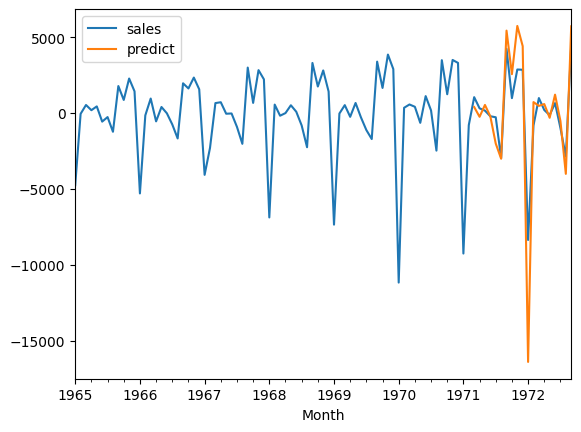

In [98]:
rolling_mean_detrended_diff['predict'] = model.predict(start= len(train) ,
                                                       end=len(train)+len(test)- 1,
                                                       dynamic=True)
rolling_mean_detrended_diff[['sales','predict']].plot()

In [ ]:
#predicting the projections for the next 5 years
#for next 5 years = 5 x 12 =60 where the 12 is the seasonality

<Axes: xlabel='Month'>

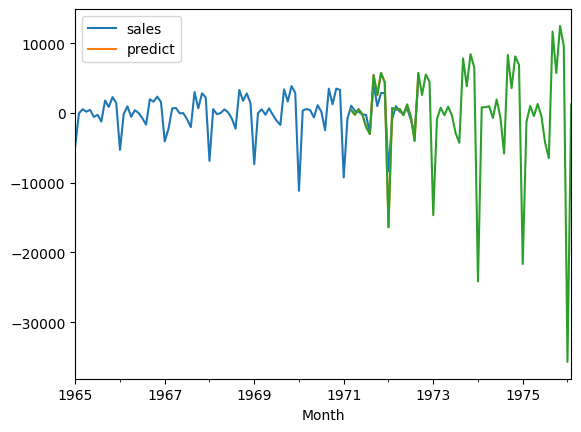

In [99]:
forecast = model.forecast(steps=60)
rolling_mean_detrended_diff.plot()
forecast.plot()